In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [2]:
orders = pd.read_csv("orders.csv.zip", sep="|")

In [3]:
orders['time'] = pd.to_datetime(orders['time'])
orders['day_of_week'] = orders['time'].dt.day_of_week
orders['week_of_month'] = (orders['time'].dt.day - 1) // 7 + 1
orders['orderValue'] = orders['order'] * orders['salesPrice']

In [4]:
orders

time  transactID  itemID  order  salesPrice  \
0       2018-01-01 00:01:56     2278968     450      1       17.42   
1       2018-01-01 00:01:56     2278968      83      1        5.19   
2       2018-01-01 00:07:11     2255797    7851      2       20.47   
3       2018-01-01 00:09:24     2278968     450      1       17.42   
4       2018-01-01 00:09:24     2278968      83      1        5.19   
...                     ...         ...     ...    ...         ...   
2181950 2018-06-29 23:54:22     2040347    9217      1       23.50   
2181951 2018-06-29 23:55:09     2260943    2175      1       11.60   
2181952 2018-06-29 23:55:09     2260943    2061      1        1.03   
2181953 2018-06-29 23:55:09     2260943    2195      1       18.73   
2181954 2018-06-29 23:57:01        2525    8462      1       18.93   

         day_of_week  week_of_month  orderValue  
0                  0              1       17.42  
1                  0              1        5.19  
2                  0              1       40.94  
3                  0              1       17.42  
4                  0              1        5.19  
...              ...            ...         ...  
2181950            4              5       23.50  
2181951            4              5       11.60  
2181952            4              5        1.03  
2181953            4              5       18.73  
2181954            4              5       18.93  

[2181955 rows x 8 columns]

In [5]:
orders

time  transactID  itemID  order  salesPrice  \
0       2018-01-01 00:01:56     2278968     450      1       17.42   
1       2018-01-01 00:01:56     2278968      83      1        5.19   
2       2018-01-01 00:07:11     2255797    7851      2       20.47   
3       2018-01-01 00:09:24     2278968     450      1       17.42   
4       2018-01-01 00:09:24     2278968      83      1        5.19   
...                     ...         ...     ...    ...         ...   
2181950 2018-06-29 23:54:22     2040347    9217      1       23.50   
2181951 2018-06-29 23:55:09     2260943    2175      1       11.60   
2181952 2018-06-29 23:55:09     2260943    2061      1        1.03   
2181953 2018-06-29 23:55:09     2260943    2195      1       18.73   
2181954 2018-06-29 23:57:01        2525    8462      1       18.93   

         day_of_week  week_of_month  orderValue  
0                  0              1       17.42  
1                  0              1        5.19  
2                  0              1       40.94  
3                  0              1       17.42  
4                  0              1        5.19  
...              ...            ...         ...  
2181950            4              5       23.50  
2181951            4              5       11.60  
2181952            4              5        1.03  
2181953            4              5       18.73  
2181954            4              5       18.93  

[2181955 rows x 8 columns]

In [6]:
orders['itemID'].value_counts()

itemID
5035    8973
5117    8063
7789    7415
5122    6442
5139    5407
        ... 
5394       1
7530       1
6432       1
8645       1
7176       1
Name: count, Length: 9840, dtype: int64

In [7]:
orders

time  transactID  itemID  order  salesPrice  \
0       2018-01-01 00:01:56     2278968     450      1       17.42   
1       2018-01-01 00:01:56     2278968      83      1        5.19   
2       2018-01-01 00:07:11     2255797    7851      2       20.47   
3       2018-01-01 00:09:24     2278968     450      1       17.42   
4       2018-01-01 00:09:24     2278968      83      1        5.19   
...                     ...         ...     ...    ...         ...   
2181950 2018-06-29 23:54:22     2040347    9217      1       23.50   
2181951 2018-06-29 23:55:09     2260943    2175      1       11.60   
2181952 2018-06-29 23:55:09     2260943    2061      1        1.03   
2181953 2018-06-29 23:55:09     2260943    2195      1       18.73   
2181954 2018-06-29 23:57:01        2525    8462      1       18.93   

         day_of_week  week_of_month  orderValue  
0                  0              1       17.42  
1                  0              1        5.19  
2                  0              1       40.94  
3                  0              1       17.42  
4                  0              1        5.19  
...              ...            ...         ...  
2181950            4              5       23.50  
2181951            4              5       11.60  
2181952            4              5        1.03  
2181953            4              5       18.73  
2181954            4              5       18.93  

[2181955 rows x 8 columns]

In [8]:
total_orders = orders.groupby([orders['time'].dt.date, orders['itemID']])['order'].sum().unstack(1)
total_values = orders.groupby([orders['time'].dt.date, orders['itemID']])['orderValue'].sum().unstack(1)

In [9]:
orders.groupby([orders['time'].dt.date, orders['itemID']])['orderValue'].sum()

time        itemID
2018-01-01  9            199.84
            11             2.13
            19           155.28
            26          1498.75
            35        164185.98
                        ...    
2018-06-29  10372         99.67
            10392          6.80
            10431       4740.12
            10449       9799.40
            10450         88.96
Name: orderValue, Length: 100148, dtype: float64

In [10]:
total_orders.fillna(0, inplace=True)
total_values.fillna(0, inplace=True)

In [11]:
total_values

itemID      1      2        3      4      5      6      7      8       9      \
time                                                                           
2018-01-01   0.00    0.0     0.00    0.0    0.0    0.0   0.00    0.0  199.84   
2018-01-02   0.00    0.0     0.00    0.0    0.0    0.0   0.00    0.0    0.00   
2018-01-03   0.00    0.0     0.00    0.0    0.0    0.0   0.00    0.0    0.00   
2018-01-04   0.00    0.0     0.00    0.0    0.0    0.0   0.00    0.0    0.00   
2018-01-05   0.00    0.0     0.00    0.0    0.0    0.0   0.00    0.0    0.00   
...           ...    ...      ...    ...    ...    ...    ...    ...     ...   
2018-06-25   0.00    0.0     0.00    0.0    0.0    0.0   0.00    0.0    0.00   
2018-06-26   3.43    0.0     0.00    0.0    0.0    0.0   0.00    0.0    0.00   
2018-06-27   0.00    0.0     0.00    0.0    0.0    0.0   0.00    0.0    0.00   
2018-06-28   0.00    0.0  1937.52   14.1    0.0    0.0  34.39    0.0    0.00   
2018-06-29   0.00    0.0    14.04    0.0    0.0    0.0   0.00    0.0    0.00   

itemID      10     ...    10440  10441  10442  10443   10449  10450  10459  \
time               ...                                                       
2018-01-01   0.00  ...     0.00    0.0    0.0    0.0     0.0   0.00    0.0   
2018-01-02   0.00  ...     0.00    0.0    0.0    0.0     0.0   0.00    0.0   
2018-01-03   0.00  ...     0.00    0.0    0.0    0.0     0.0   0.00    0.0   
2018-01-04   0.00  ...     0.00    0.0    0.0    0.0     0.0   0.00    0.0   
2018-01-05   0.00  ...     0.00    0.0    0.0    0.0     0.0   0.00    0.0   
...           ...  ...      ...    ...    ...    ...     ...    ...    ...   
2018-06-25   0.00  ...     0.00    0.0    0.0    0.0     0.0   0.00    0.0   
2018-06-26  48.34  ...  1372.60    0.0    0.0    0.0     0.0   0.00    0.0   
2018-06-27   0.00  ...     0.00    0.0    0.0    0.0     0.0  44.48    0.0   
2018-06-28   0.00  ...    40.89    0.0    0.0    0.0     0.0   0.00    0.0   
2018-06-29   0.00  ...     0.00    0.0    0.0    0.0  9799.4  88.96    0.0   

itemID      10460  10462  10463  
time                             
2018-01-01    0.0    0.0    0.0  
2018-01-02    0.0    0.0    0.0  
2018-01-03    0.0    0.0    0.0  
2018-01-04    0.0    0.0    0.0  
2018-01-05    0.0    0.0    0.0  
...           ...    ...    ...  
2018-06-25    0.0    0.0    0.0  
2018-06-26    0.0    0.0    0.0  
2018-06-27    0.0    0.0    0.0  
2018-06-28    0.0    0.0    0.0  
2018-06-29    0.0    0.0    0.0  

[180 rows x 9840 columns]

In [12]:
total_values.apply(lambda x: x.rolling(window=14).mean(), axis=0)

itemID      1      2           3           4         5      6         7      \
time                                                                          
2018-01-01    NaN    NaN         NaN         NaN       NaN    NaN       NaN   
2018-01-02    NaN    NaN         NaN         NaN       NaN    NaN       NaN   
2018-01-03    NaN    NaN         NaN         NaN       NaN    NaN       NaN   
2018-01-04    NaN    NaN         NaN         NaN       NaN    NaN       NaN   
2018-01-05    NaN    NaN         NaN         NaN       NaN    NaN       NaN   
...           ...    ...         ...         ...       ...    ...       ...   
2018-06-25  0.490    0.0    1.002857  145.028571  0.534286    0.0  0.000000   
2018-06-26  0.735    0.0    1.002857  145.028571  0.534286    0.0  0.000000   
2018-06-27  0.735    0.0    1.002857  145.028571  0.534286    0.0  0.000000   
2018-06-28  0.735    0.0  139.397143  146.035714  0.534286    0.0  2.456429   
2018-06-29  0.735    0.0  140.400000  146.035714  0.534286    0.0  2.456429   

itemID         8          9         10     ...       10440  10441  10442  \
time                                       ...                             
2018-01-01       NaN        NaN       NaN  ...         NaN    NaN    NaN   
2018-01-02       NaN        NaN       NaN  ...         NaN    NaN    NaN   
2018-01-03       NaN        NaN       NaN  ...         NaN    NaN    NaN   
2018-01-04       NaN        NaN       NaN  ...         NaN    NaN    NaN   
2018-01-05       NaN        NaN       NaN  ...         NaN    NaN    NaN   
...              ...        ...       ...  ...         ...    ...    ...   
2018-06-25  0.355714  28.548571  0.000000  ...    0.000000    0.0    0.0   
2018-06-26  0.355714  28.548571  3.452857  ...   98.042857    0.0    0.0   
2018-06-27  0.355714  28.548571  3.452857  ...   98.042857    0.0    0.0   
2018-06-28  0.355714  28.548571  3.452857  ...  100.963571    0.0    0.0   
2018-06-29  0.355714  28.548571  3.452857  ...  100.963571    0.0    0.0   

itemID      10443       10449       10450  10459  10460  10462  10463  
time                                                                   
2018-01-01    NaN         NaN         NaN    NaN    NaN    NaN    NaN  
2018-01-02    NaN         NaN         NaN    NaN    NaN    NaN    NaN  
2018-01-03    NaN         NaN         NaN    NaN    NaN    NaN    NaN  
2018-01-04    NaN         NaN         NaN    NaN    NaN    NaN    NaN  
2018-01-05    NaN         NaN         NaN    NaN    NaN    NaN    NaN  
...           ...         ...         ...    ...    ...    ...    ...  
2018-06-25    0.0   13.460714  605.781429    0.0    0.0    0.0    0.0  
2018-06-26    0.0    0.000000  601.806429    0.0    0.0    0.0    0.0  
2018-06-27    0.0    0.000000  604.983571    0.0    0.0    0.0    0.0  
2018-06-28    0.0    0.000000  604.983571    0.0    0.0    0.0    0.0  
2018-06-29    0.0  699.957143  130.362857    0.0    0.0    0.0    0.0  

[180 rows x 9840 columns]

In [13]:
total_values[3].rolling(window=14).std()

time
2018-01-01           NaN
2018-01-02           NaN
2018-01-03           NaN
2018-01-04           NaN
2018-01-05           NaN
                 ...    
2018-06-25      3.752348
2018-06-26      3.752348
2018-06-27      3.752348
2018-06-28    517.548882
2018-06-29    517.271522
Name: 3, Length: 180, dtype: float64

In [14]:
X = total_values.values.T
cosine_sim_matrix = cosine_similarity(X)

In [15]:
from sklearn.cluster import SpectralClustering

n_clusters = 100

clustering = SpectralClustering(
    n_clusters=n_clusters,
    affinity='precomputed',
    random_state=42
)

labels = clustering.fit_predict(cosine_sim_matrix)

In [16]:
vc = np.unique(labels, return_counts=True)
vci = np.argsort(vc[1])[::-1]

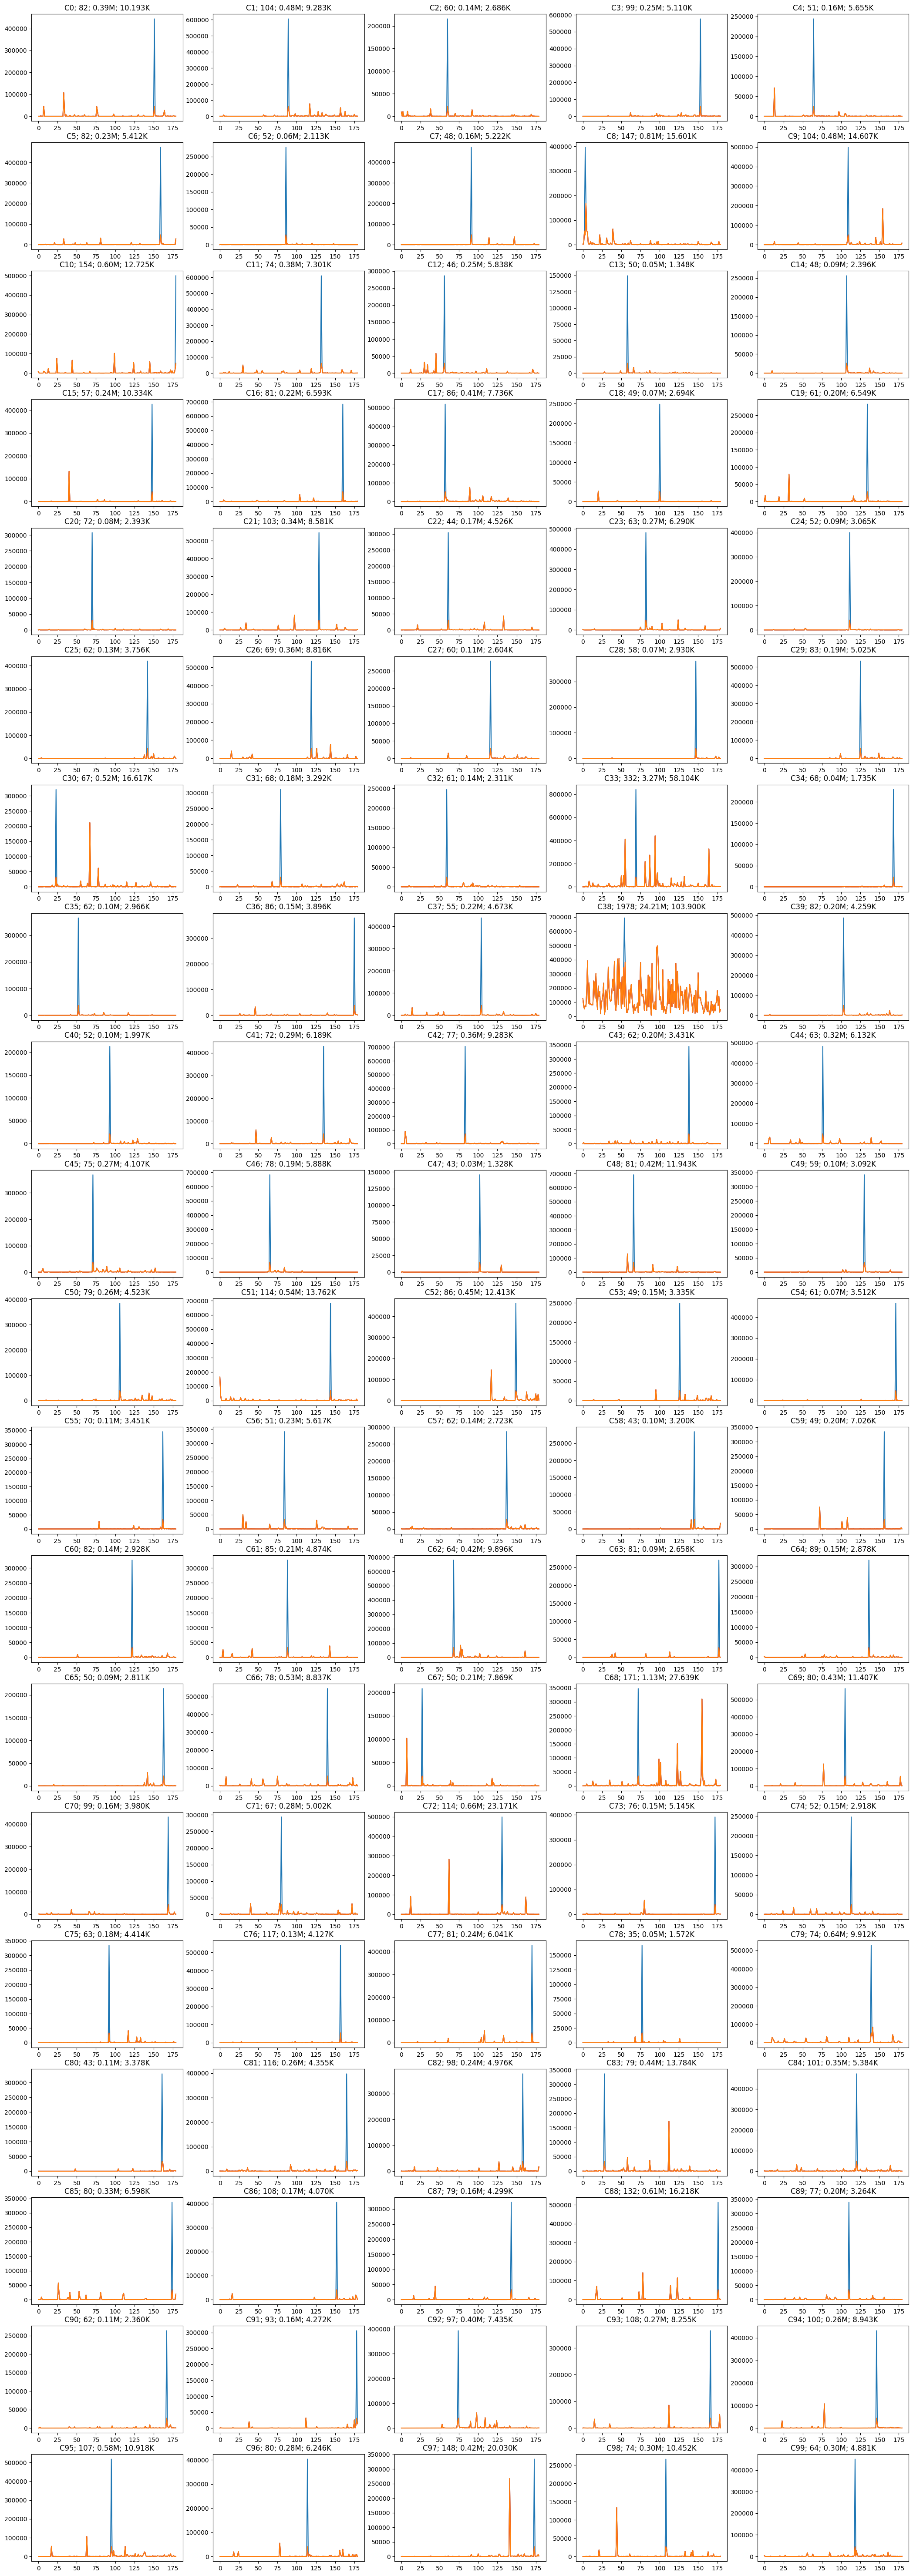

In [17]:
keep_max = False
_, axs = plt.subplots(20, 5, figsize=(26,76))
axs = axs.flatten()
for i, (l, ax) in enumerate(zip(np.unique(labels), axs)):
    mask = labels == l
    vals = total_values.loc[:, mask].sum(axis=1).values
    ax.plot(vals)
    if not keep_max:
        mi = np.argmax(vals)
        vals[mi] /= 10
        ax.plot(vals, color='red')
    ax.plot(vals)
    ax.set_title(f"C{l}; {mask.sum()}; {vals.sum() / 1_000_000:.2f}M; {vals.std() / 1_000:.3f}K")

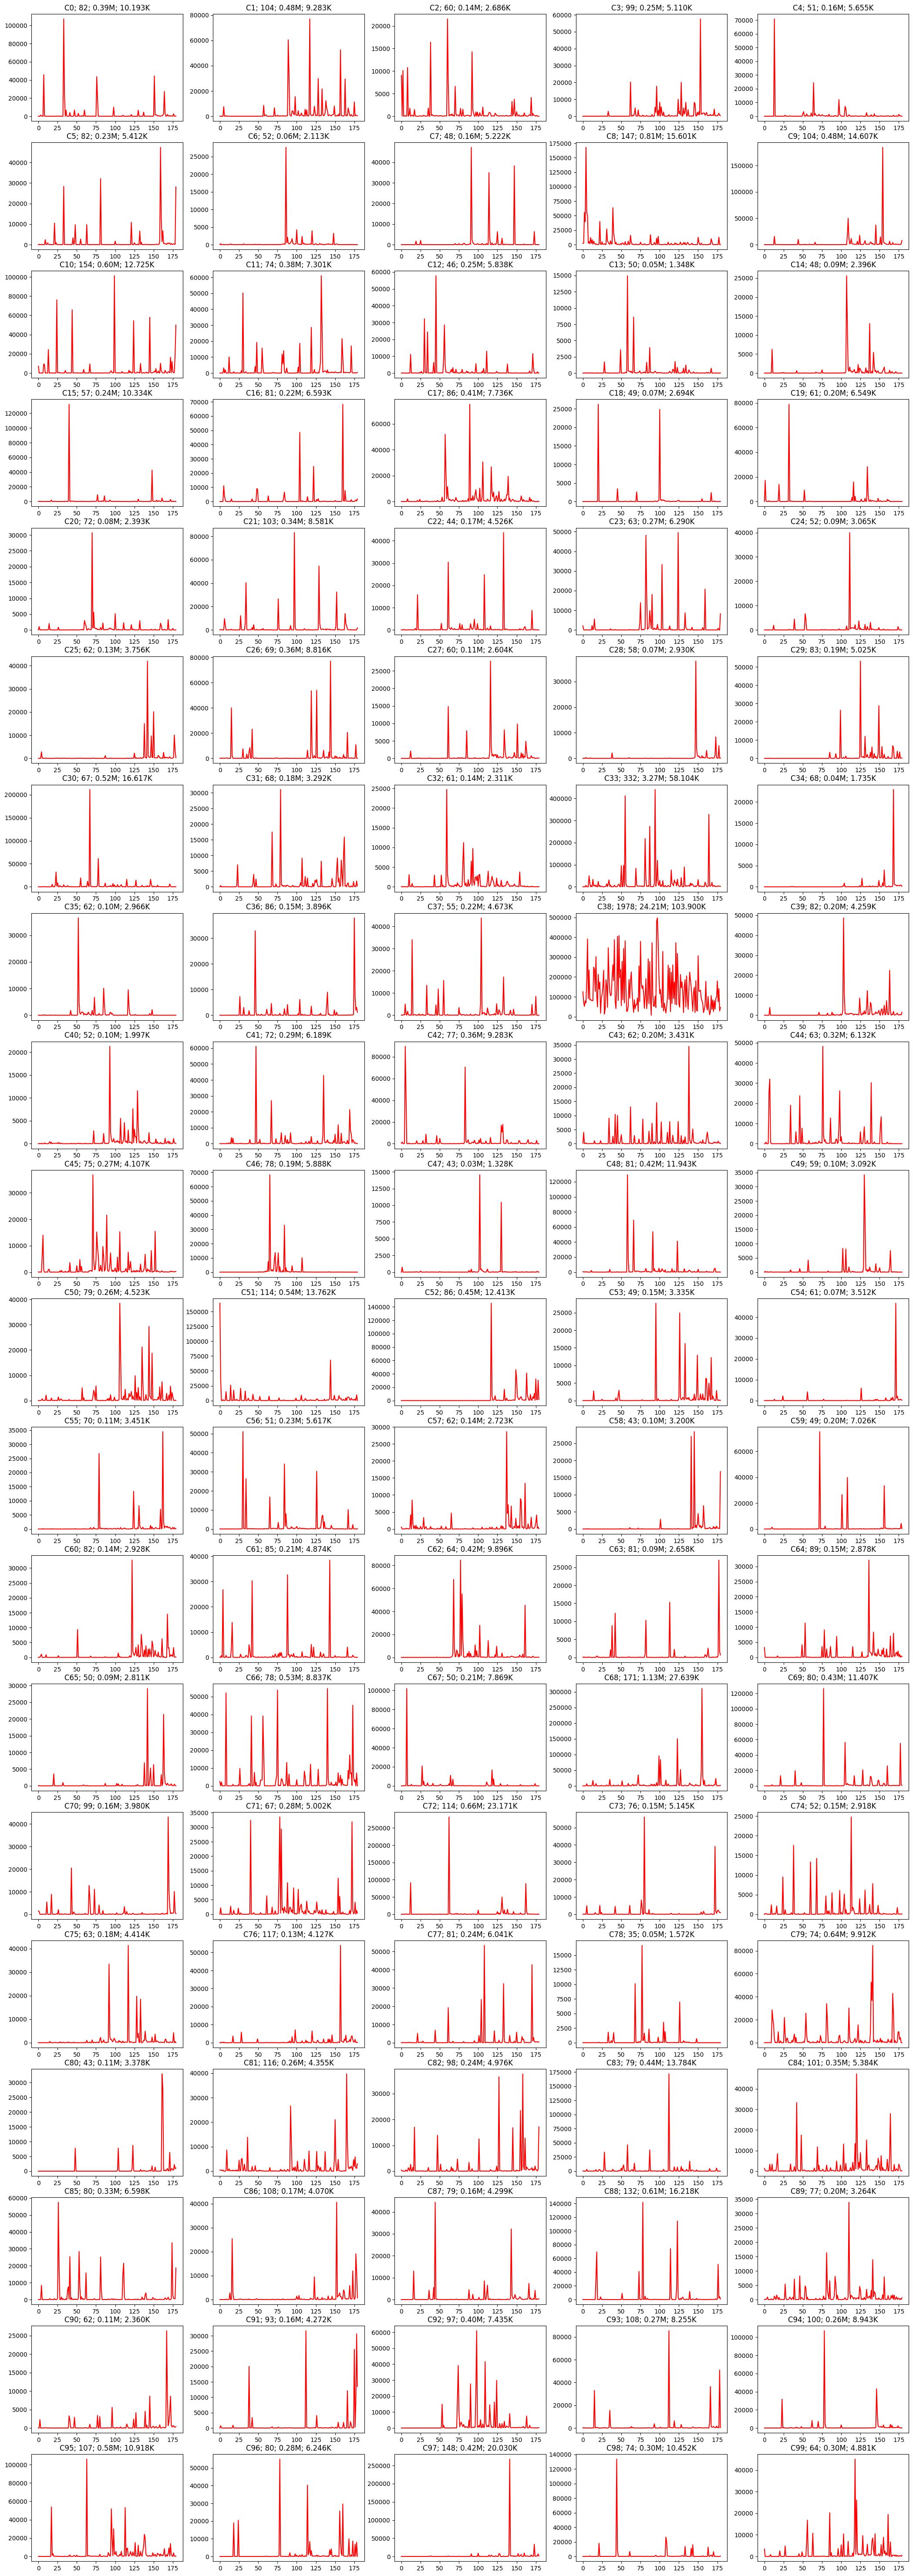

In [18]:
_, axs = plt.subplots(20, 5, figsize=(26,76))
axs = axs.flatten()
for i, (l, ax) in enumerate(zip(np.unique(labels), axs)):
    mask = labels == l
    vals = total_values.loc[:, mask].sum(axis=1).values
    mi = np.argmax(vals)
    vals[mi] /= 10
    ax.plot(vals, color='red')
    ax.set_title(f"C{l}; {mask.sum()}; {vals.sum() / 1_000_000:.2f}M; {vals.std() / 1_000:.3f}K")

In [19]:
for k, df in orders.groupby(by='itemID'):
    s1 = df['orderValue'].sum()
    s2 = total_values[k].sum()
    if np.isclose(s1, s2, rtol=1e-9):
        continue
    raise Exception(f"Uneven sums for {k}: {s1} != {s2}")

In [20]:
stuff = pd.DataFrame({
    'total value': total_values.sum(),
    'N. days had sales': (total_values != 0).sum()
})
stuff['average value sell day'] = stuff['total value'] / stuff['N. days had sales']
stuff.corr()

total value  N. days had sales  average value sell day
total value                1.000000           0.326009                0.483055
N. days had sales          0.326009           1.000000               -0.140865
average value sell day     0.483055          -0.140865                1.000000

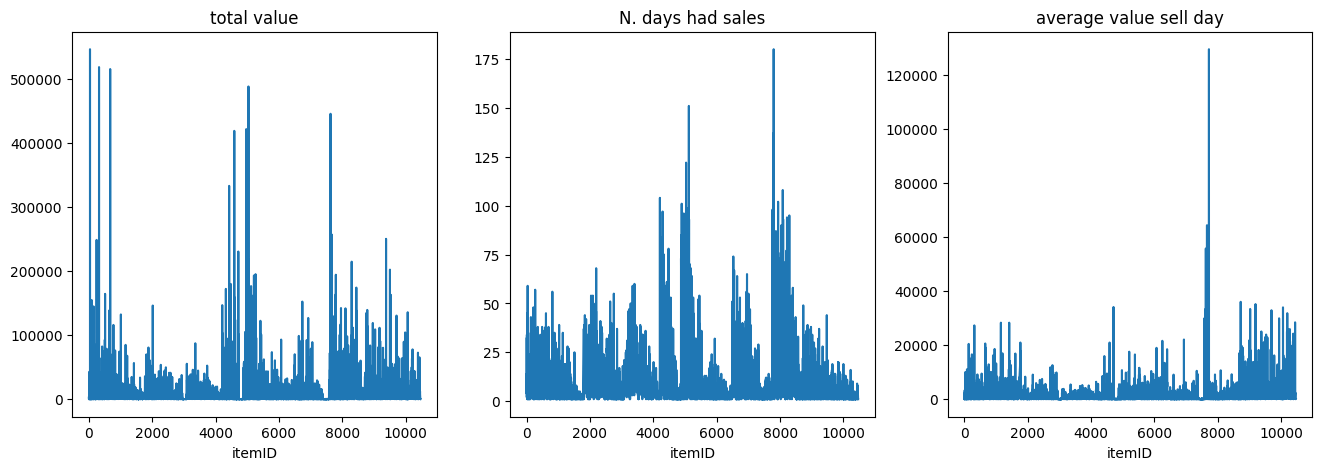

In [21]:
_, axs = plt.subplots(1, 3, figsize=(16, 5))
for a, c in zip(axs, stuff.columns):
    stuff[c].plot(ax=a, title=c) 

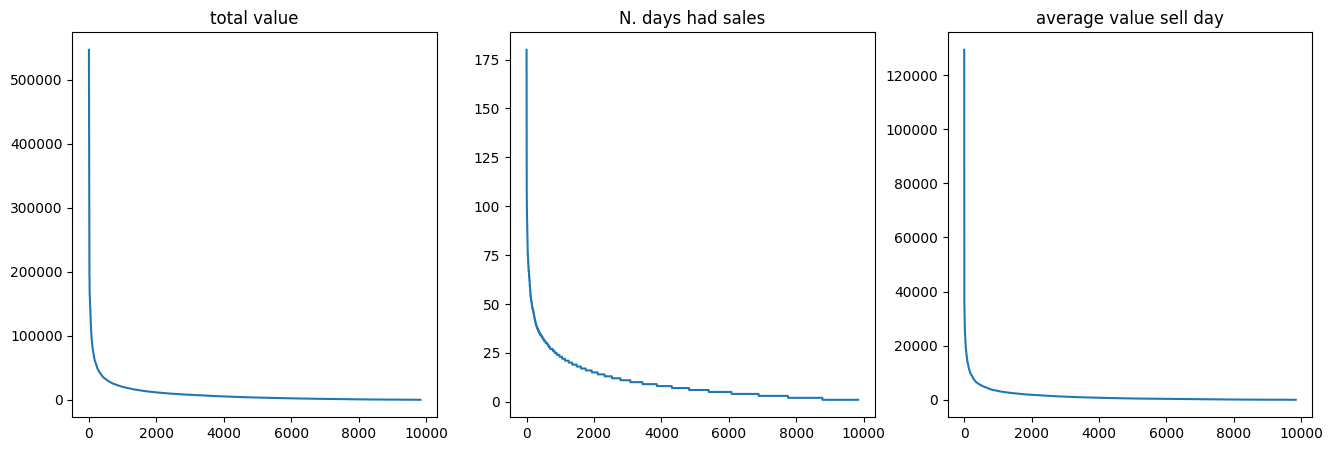

In [22]:
_, axs = plt.subplots(1, 3, figsize=(16, 5))
for a, c in zip(axs, stuff.columns):
    a.plot(stuff[c].sort_values(ascending=False).values)
    a.set_title(c)

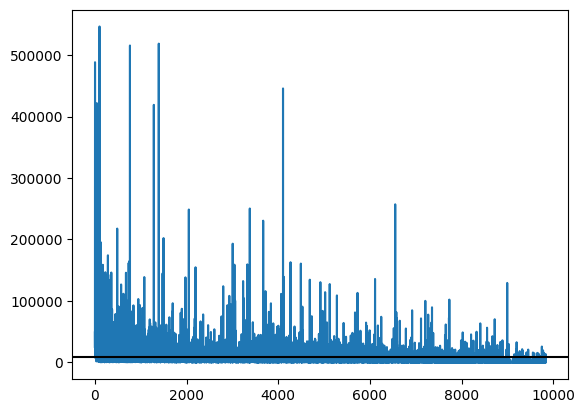

In [23]:
# plt.plot(np.cumsum(stuff['total value'].sort_values().values))
i = stuff['N. days had sales'].sort_values(ascending=False).index
# plt.plot(np.cumsum(stuff['total value'].reindex(i).values))
plt.plot(stuff['total value'].reindex(i).values)
plt.axhline(stuff['total value'].mean(), color='black')

In [24]:
stuff['total value'].max(), stuff['total value'].min()

(np.float64(546429.520000001), np.float64(1.33))

1: 8777
5: 5405
25: 830
50: 152
100: 9


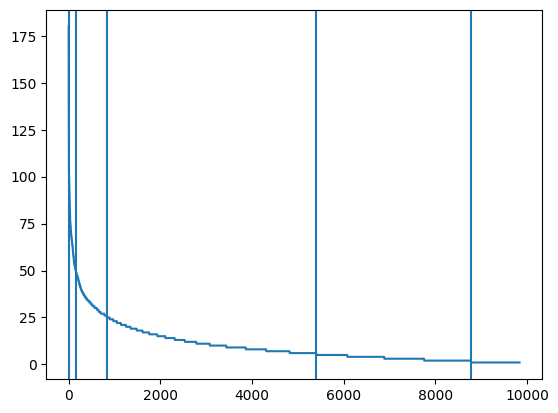

In [25]:
plt.plot(stuff['N. days had sales'].sort_values(ascending=False).values)

# for i in [1, 5] + list(range(10, 180, 10)):
for i in [1, 5, 25, 50, 100]:
    mask = stuff['N. days had sales'].sort_values(ascending=False).values > i
    j = np.argmin(mask)
    print(f"{i}: {mask.sum()}")
    plt.axvline(j)

<Axes: xlabel='time'>

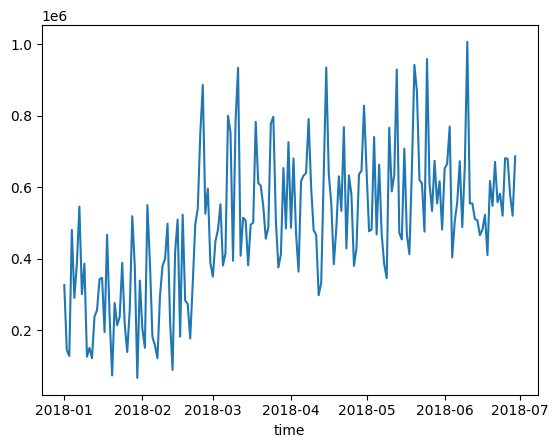

In [26]:
total_values.sum(axis=1).plot()

<Axes: xlabel='time'>

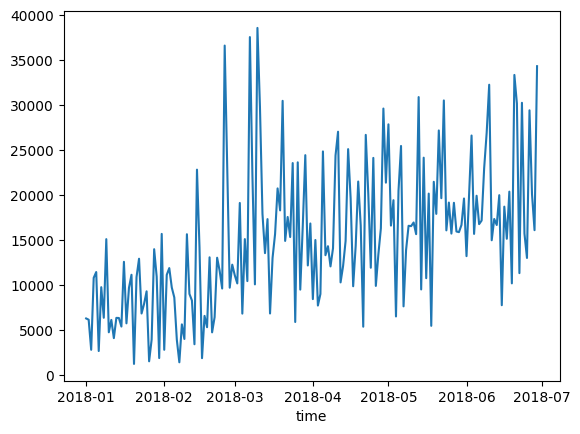

In [27]:
total_orders.sum(axis=1).plot()

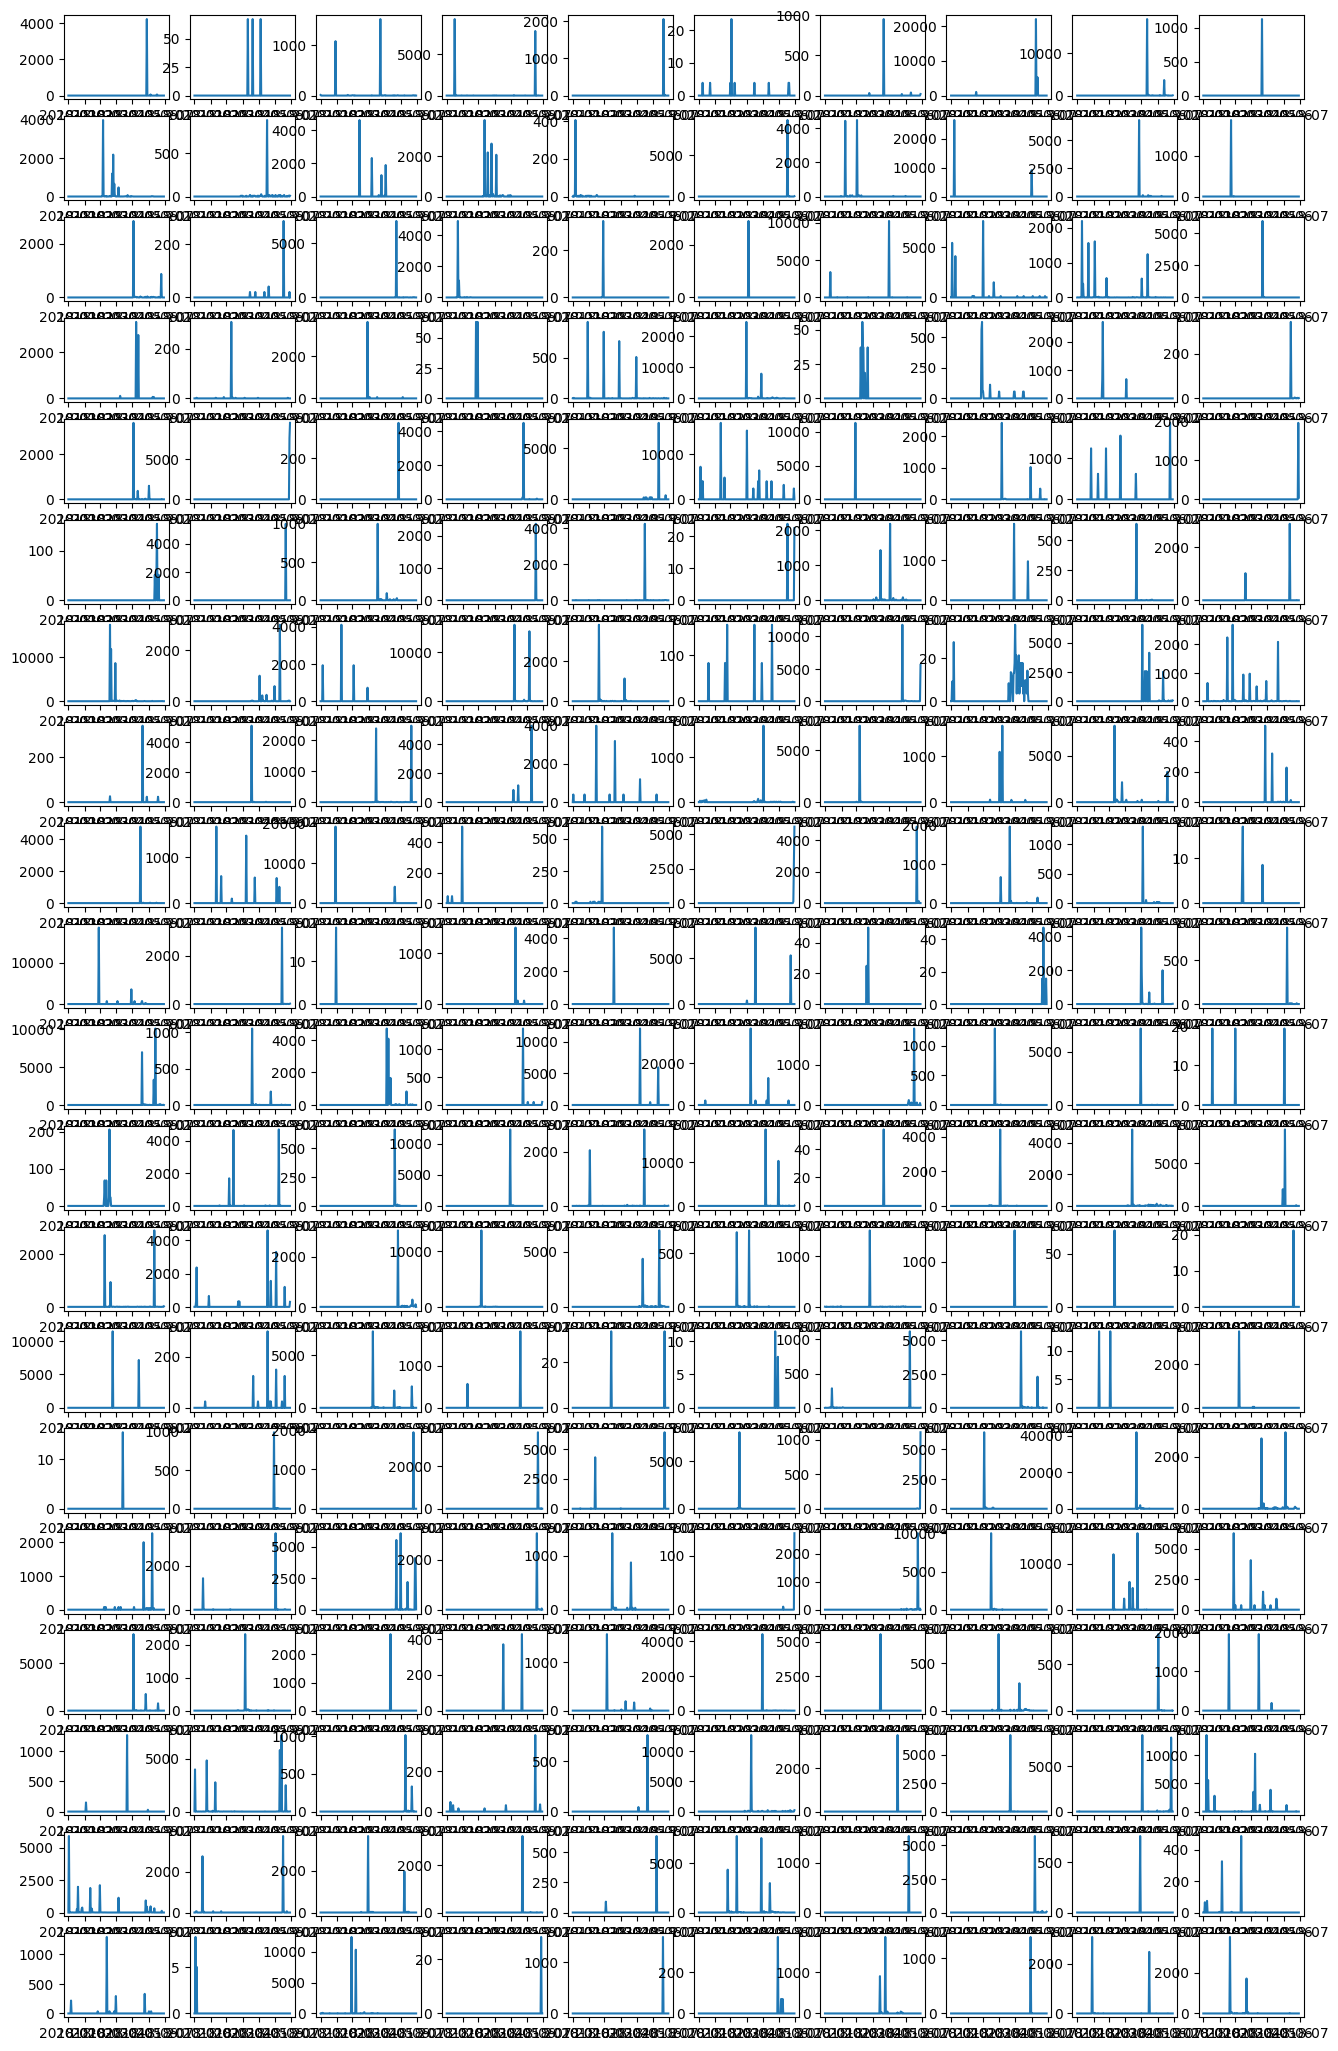

In [28]:
np.random.seed(42)
_, axs = plt.subplots(20, 10, figsize=(16,26))
axs = axs.flatten()
for a, i in zip(axs, np.random.permutation(len(total_values.columns))[:200]):
    c = total_values.columns[i]
    a.plot(total_values[c])

In [29]:
total_values.columns

Index([    1,     2,     3,     4,     5,     6,     7,     8,     9,    10,
       ...
       10440, 10441, 10442, 10443, 10449, 10450, 10459, 10460, 10462, 10463],
      dtype='int64', name='itemID', length=9840)

In [30]:
items = pd.read_csv("items.csv", sep="|")

In [31]:
for c in items.columns:
    if 'category' not in c:
        continue
    print(items[c].value_counts())

category1
2    2348
1    1823
8    1734
5    1679
7    1121
4     969
6     489
3     300
Name: count, dtype: int64
category2
44    1348
8     1119
32    1085
1      641
23     623
11     510
5      494
10     462
39     383
24     358
19     329
38     305
28     298
43     252
4      252
6      214
34     181
9      157
21     157
3      134
25      95
30      92
42      86
14      68
40      68
2       64
41      59
18      58
47      58
12      56
22      54
17      54
15      47
13      46
29      45
16      27
26      24
7       24
48      23
45      20
31      18
20      14
46      13
37       9
50       9
49       8
36       7
27       7
35       3
33       2
52       2
51       1
Name: count, dtype: int64
category3
2    2400
1    1823
8    1735
4    1680
6    1018
7     957
3     646
5     204
Name: count, dtype: int64


In [32]:
def plot_merged(items, orders, cat='category3', return_seq=False):
    merged = pd.merge(orders, items, how='inner')
    total_orders_c3 = merged.groupby([merged['time'].dt.date, merged[cat]])['order'].sum().unstack(1)
    d, m = divmod(total_orders_c3.columns.__len__(), 4)
    _, axs = plt.subplots(d + (m != 0), 4, figsize=(17,8))
    axs = axs.flatten()
    for a, c in zip(axs, total_orders_c3.columns):
        a.plot(total_orders_c3[c].values)
    if return_seq:
        return total_orders_c3

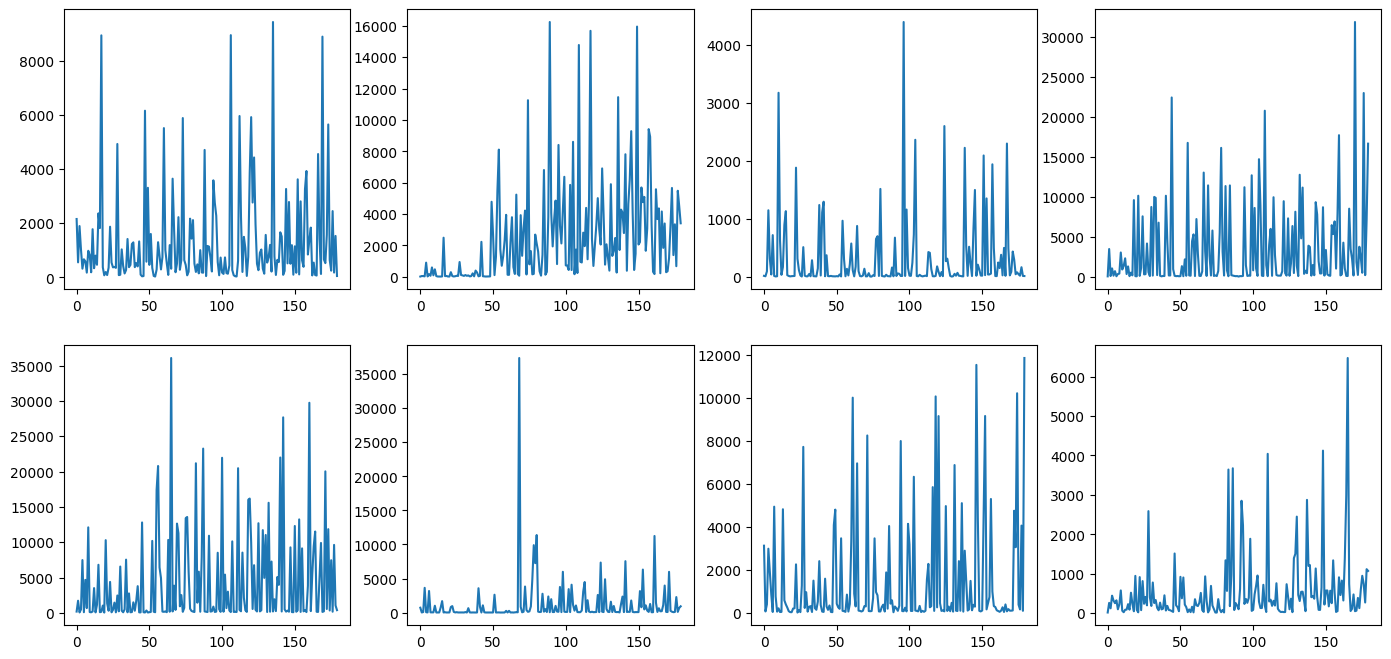

In [33]:
seq = plot_merged(items, orders, 'category1', True)

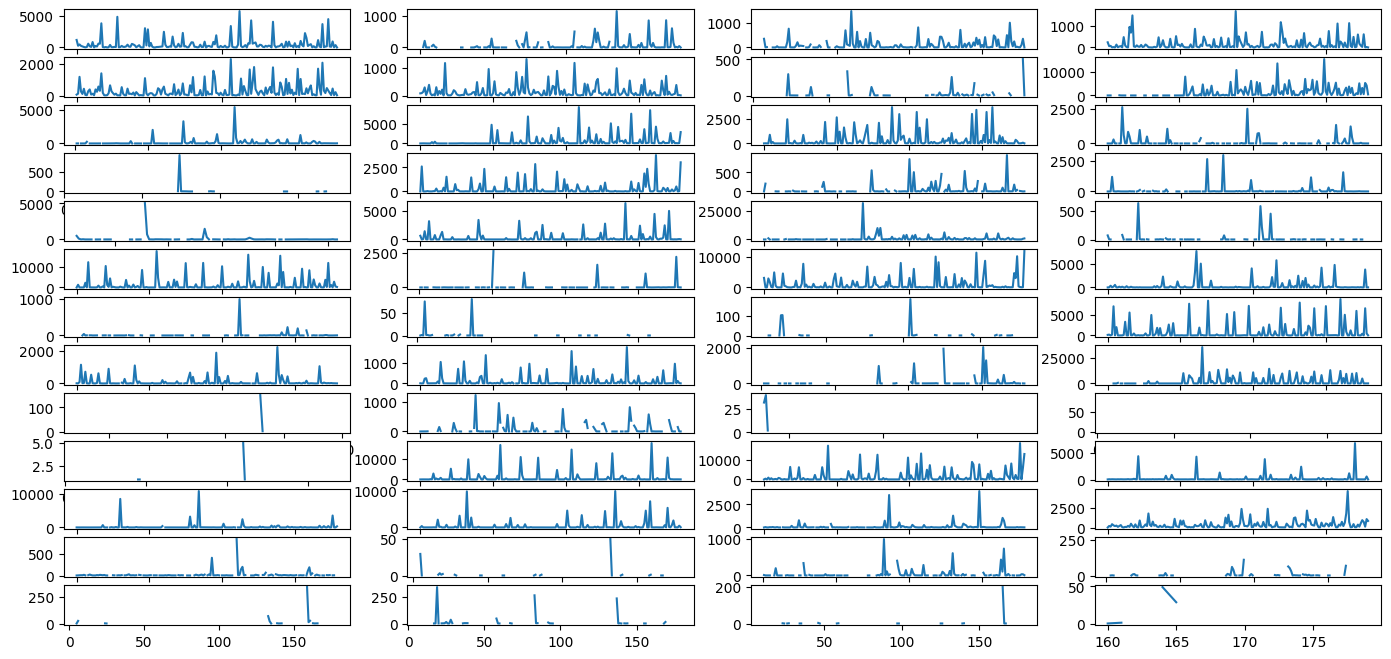

In [34]:
plot_merged(items, orders, cat='category2')

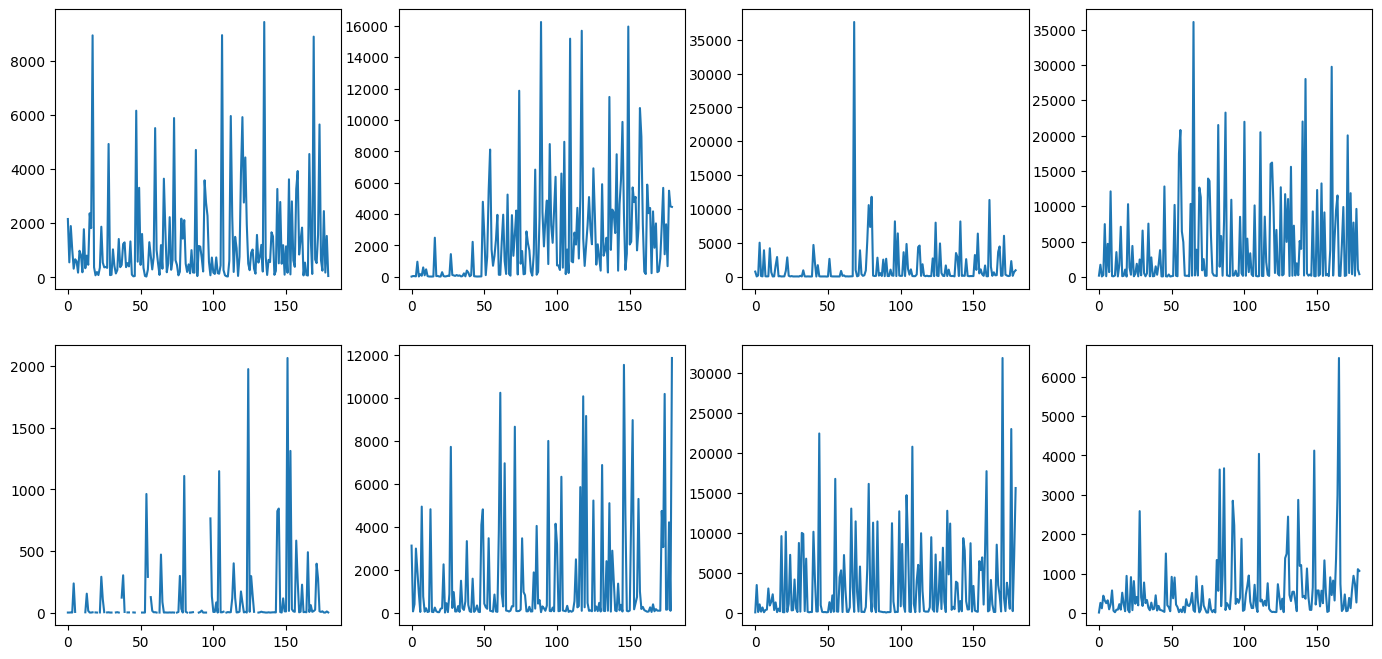

In [35]:
plot_merged(items, orders, 'category3')

# BASIC MODEL

In [36]:
from statsmodels.tsa.arima.model import ARIMA

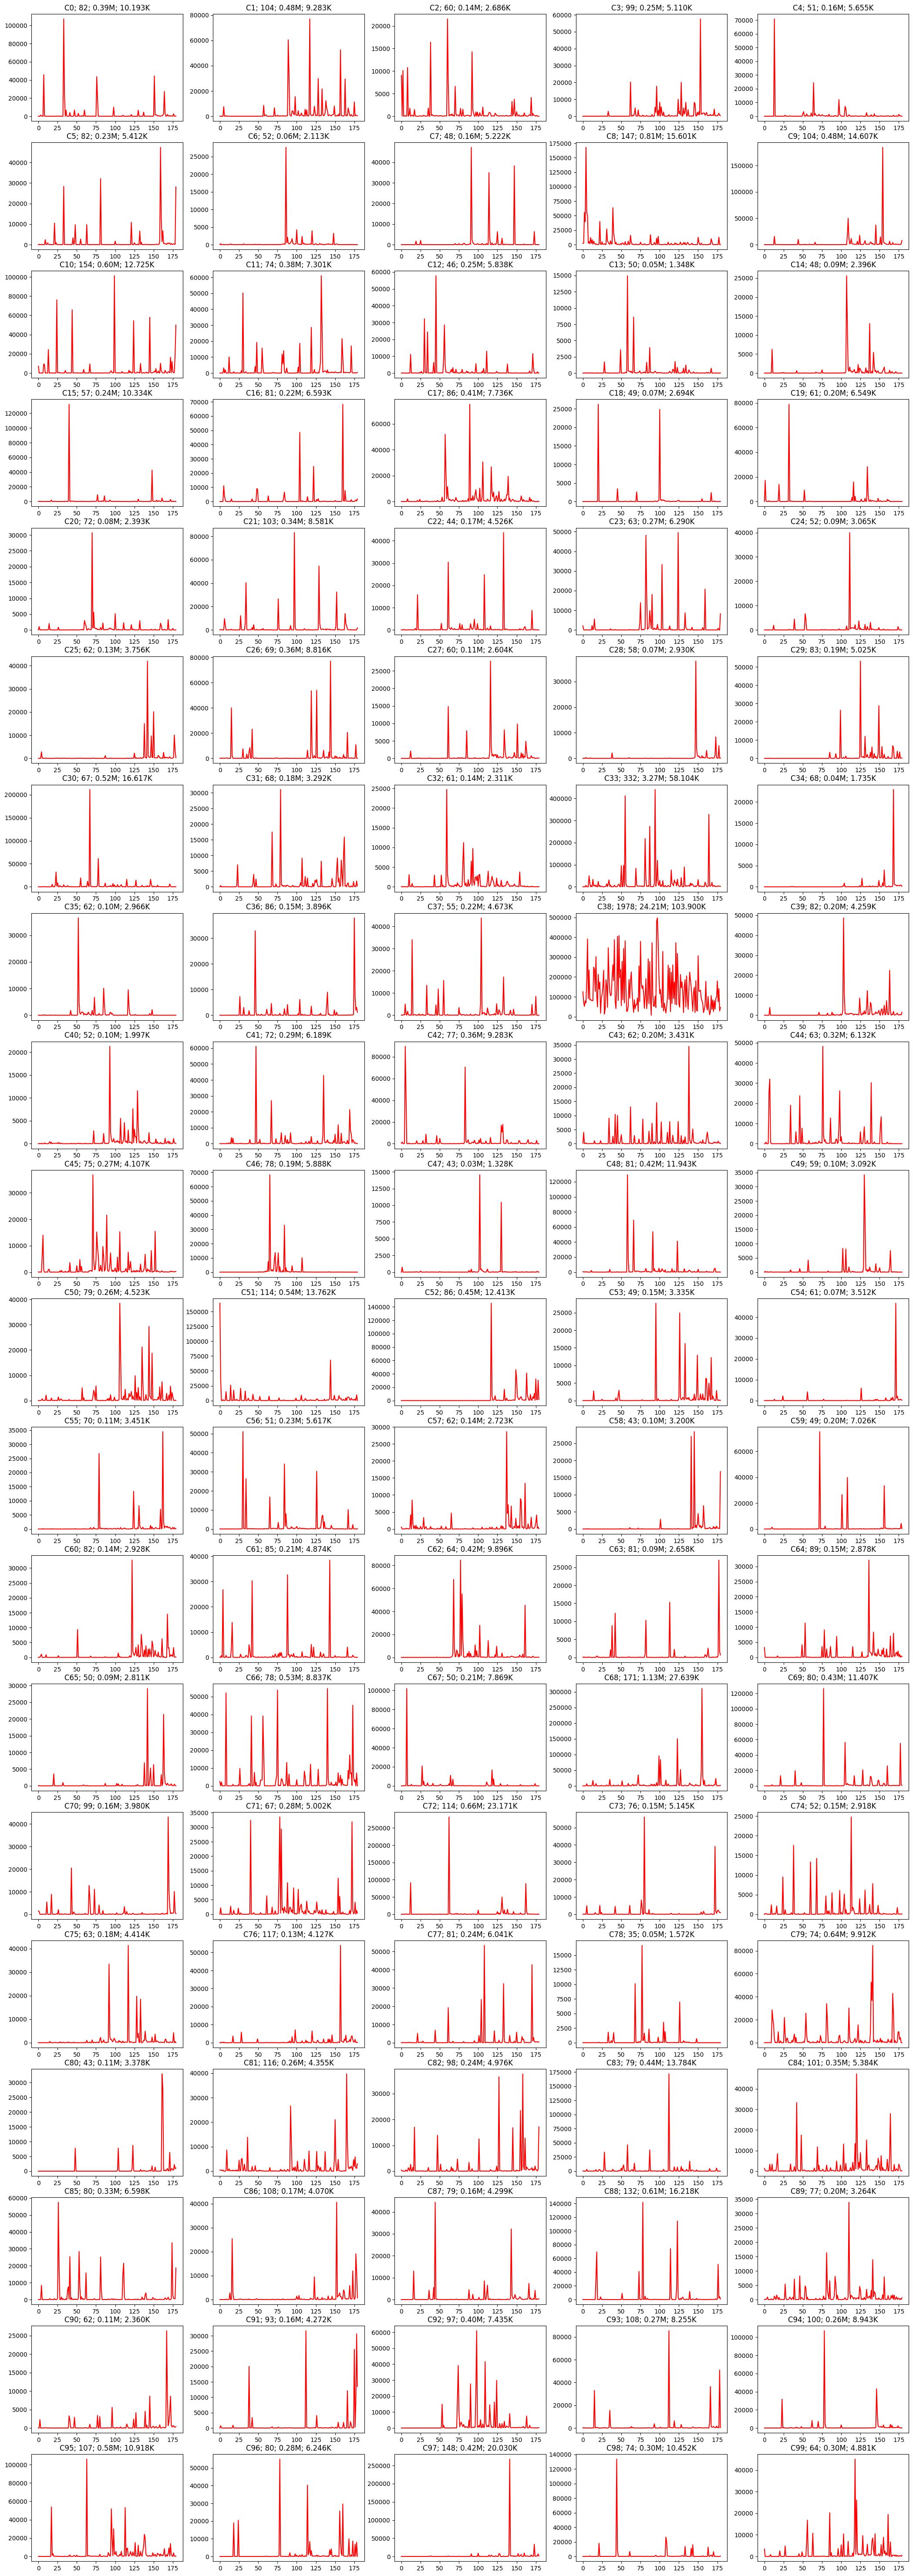

In [37]:
_, axs = plt.subplots(20, 5, figsize=(26,76))
axs = axs.flatten()
for i, (l, ax) in enumerate(zip(np.unique(labels), axs)):
    mask = labels == l
    vals = total_values.loc[:, mask].sum(axis=1).values
    mi = np.argmax(vals)
    vals[mi] /= 10
    ax.plot(vals, color='red')
    ax.set_title(f"C{l}; {mask.sum()}; {vals.sum() / 1_000_000:.2f}M; {vals.std() / 1_000:.3f}K")

In [38]:
def get_harmonics(data, num_harmonics=1):
    all_coefs = np.fft.fft(data)
    coeffs = []
    for i in range(1, num_harmonics + 1):
        coeffs.append(np.zeros(len(all_coefs), dtype=complex))
        coeffs[-1][i] = all_coefs[i]
        coeffs[-1][-i] = all_coefs[-i]

    reconstructed_coeffs = np.zeros(len(all_coefs), dtype=complex)
    for i in range(num_harmonics):
        reconstructed_coeffs += coeffs[i]
    reconstructed_signal = np.fft.ifft(reconstructed_coeffs).real
    reconstructed_signal += data.mean()
    return reconstructed_signal

In [39]:
mask = labels == vc[0][vci[0]]
# data = total_values.loc[:, mask].sum(axis=1)
data = total_orders.loc[:, mask].sum(axis=1)
mask.sum()

np.int64(1978)

In [40]:
model = ARIMA(data[:166], order=(14, 2, 14))
model_fit = model.fit()
forecast_raw = model_fit.forecast(steps=14)
forecast_raw = model_fit.forecast(steps=14)

c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zer

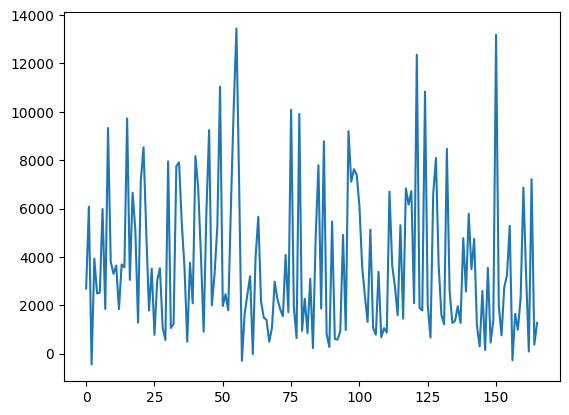

In [41]:
grr = get_harmonics(data[:166], num_harmonics=80)
(len(grr))
plt.plot(grr)

In [42]:
def predict_arima(data, order=(14, 2, 14)):
    model = ARIMA(data, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=14)

In [43]:
x_train, x_test = grr[:166], grr[166:]

In [44]:
model = ARIMA(x_train, order=(14, 2, 14))
model_fit = model.fit()
forecast = model_fit.forecast(steps=14)

c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\dviva\.virtualenvs\case-automated-inventory-management-execut-tVQubp4F\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [45]:
forecast = model_fit.forecast(steps=14)

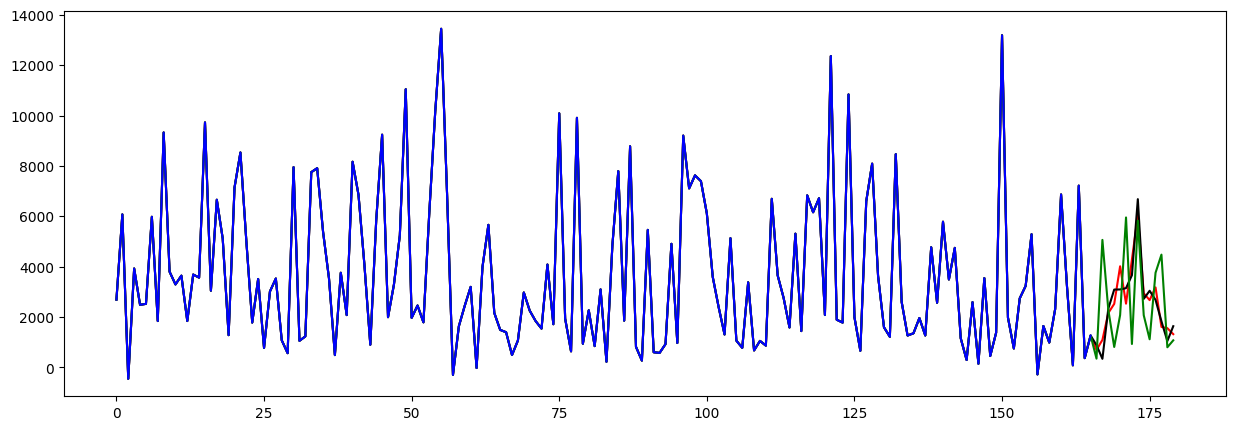

In [46]:
_, ax = plt.subplots(figsize=(15, 5))
ax.plot(list(x_train) + list(forecast), color='red')
ax.plot(list(x_train) + list(forecast_raw), color='black')
ax.plot(list(x_train) + list(data[166:]), color='green')
ax.plot(list(x_train), color='blue')

In [47]:
print('Raw actual', data[166:].sum())
print('Raw predict', forecast_raw.sum())
print('FFT predict', forecast.sum())

Raw actual 36626.0
Raw predict 36222.0960820434
FFT predict 36655.425136070146


In [48]:
# subset = total_values.loc[:, mask]
# np.random.seed(42)
# _, axs = plt.subplots(20, 10, figsize=(16,26))
# axs = axs.flatten()
# for a, i in zip(axs, np.random.permutation(len(subset.columns))[:200]):
#     c = subset.columns[i]
#     a.plot(subset[c])

In [49]:
def add_cols(subset):
    for lag in [1, 2, 3, 7, 14, 28]:
        subset[f'lag_{lag}'] = subset['y'].shift(lag)

    # ---- Rolling statistics ----
    subset['rolling_mean_7'] = subset['y'].shift(1).rolling(window=7).mean()
    subset['rolling_std_7'] = subset['y'].shift(1).rolling(window=7).std()
    subset['rolling_min_7'] = subset['y'].shift(1).rolling(window=7).min()
    subset['rolling_max_7'] = subset['y'].shift(1).rolling(window=7).max()
    subset['rolling_mean_28'] = subset['y'].shift(1).rolling(window=28).mean()
    subset['rolling_std_28'] = subset['y'].shift(1).rolling(window=28).std()
    subset['rolling_min_28'] = subset['y'].shift(1).rolling(window=28).min()
    subset['rolling_max_28'] = subset['y'].shift(1).rolling(window=28).max()

    # ---- Trend and difference features ----
    # subset['diff_1'] = subset['y'].diff(1)
    # subset['diff_7'] = subset['y'].diff(7)
    # subset['trend'] = np.arange(len(subset))

    # ---- Fourier terms (seasonality) ----
    # Assume daily seasonality with period = 7 and 30
    # for period in [7, 28]:
    #     subset[f'sin_{period}'] = np.sin(2 * np.pi * subset.index.dayofyear / period)
    #     subset[f'cos_{period}'] = np.cos(2 * np.pi * subset.index.dayofyear / period)

    # ---- Drop rows with NaNs from lags/rolling ----
    subset['2w_sum'] = subset['y'].rolling(window=14).sum()
    subset.dropna(inplace=True)
    subset['2w_sum'] = subset['2w_sum'].shift(-14)
    subset.dropna(inplace=True)
    return subset

In [50]:
# subset = pd.DataFrame(total_values.loc[:, mask].sum(axis=1), columns=['y'])
subset = pd.DataFrame(total_orders.loc[:, mask].sum(axis=1), columns=['y'])
subset = add_cols(subset)
features = [x for x in subset.columns if x != '2w_sum']

X = subset[features].copy()
y = subset['2w_sum'].copy()

In [51]:
X

y   lag_1   lag_2   lag_3   lag_7   lag_14  lag_28  \
time                                                                  
2018-01-29   810.0  3741.0  2867.0   864.0  8381.0   4113.0  3659.0   
2018-01-30   894.0   810.0  3741.0  2867.0  5117.0   9234.0  5119.0   
2018-01-31  7567.0   894.0   810.0  3741.0  1751.0   3489.0   495.0   
2018-02-01  1499.0  7567.0   894.0   810.0  3484.0   6273.0  3000.0   
2018-02-02   741.0  1499.0  7567.0   894.0   864.0   5450.0  3396.0   
...            ...     ...     ...     ...     ...      ...     ...   
2018-06-11  2262.0  7817.0  1386.0  1907.0  4065.0   2954.0  2511.0   
2018-06-12  1053.0  2262.0  7817.0  1386.0  4435.0   1085.0  1386.0   
2018-06-13  6246.0  1053.0  2262.0  7817.0   603.0    715.0  1209.0   
2018-06-14  1344.0  6246.0  1053.0  2262.0   746.0  13889.0  2143.0   
2018-06-15   296.0  1344.0  6246.0  1053.0  1907.0   1250.0  1053.0   

            rolling_mean_7  rolling_std_7  rolling_min_7  rolling_max_7  \
time                                                                      
2018-01-29     3743.571429    2466.106368          864.0         8381.0   
2018-01-30     2662.000000    1602.165410          810.0         5117.0   
2018-01-31     2058.714286    1287.939403          810.0         3741.0   
2018-02-01     2889.571429    2427.858649          810.0         7567.0   
2018-02-02     2606.000000    2462.533925          810.0         7567.0   
...                    ...            ...            ...            ...   
2018-06-11     2994.142857    2614.780706          603.0         7817.0   
2018-06-12     2736.571429    2580.289574          603.0         7817.0   
2018-06-13     2253.428571    2525.309543          603.0         7817.0   
2018-06-14     3059.571429    2796.747448          746.0         7817.0   
2018-06-15     3145.000000    2722.445714         1053.0         7817.0   

            rolling_mean_28  rolling_std_28  rolling_min_28  rolling_max_28  
time                                                                         
2018-01-29      4072.285714     2525.586838           495.0         10128.0  
2018-01-30      3970.535714     2599.171641           495.0         10128.0  
2018-01-31      3819.642857     2652.129099           495.0         10128.0  
2018-02-01      4072.214286     2660.517540           810.0         10128.0  
2018-02-02      4018.607143     2697.782839           810.0         10128.0  
...                     ...             ...             ...             ...  
2018-06-11      2806.892857     2851.617752           603.0         13889.0  
2018-06-12      2798.000000     2852.962619           603.0         13889.0  
2018-06-13      2786.107143     2859.752674           603.0         13889.0  
2018-06-14      2966.000000     2914.767483           603.0         13889.0  
2018-06-15      2937.464286     2927.008528           603.0         13889.0  

[138 rows x 15 columns]

In [ ]:

def xgboost_predict(model, X_train, y_train, X_test, y_test):


    model.fit(X[:125], y[:125])


In [53]:
from xgboost import XGBRegressor


model = XGBRegressor(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)



from sklearn.metrics import mean_squared_error, mean_absolute_error

y_pred = model.predict(X[125:])

print("MAE:", mean_absolute_error(y[125:], y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y[125:], y_pred)))

MAE: 18278.25811298077
RMSE: 18738.70213152909


In [54]:
res = pd.DataFrame({
    'actual': y[125:],
    'pred': y_pred
})

In [55]:
res.loc['total'] = res.sum(axis=0)

In [56]:
res['proportion'] = (res['actual'] / res['pred'])

In [57]:
res

actual           pred  proportion
time                                           
2018-06-03   37576.0   50630.687500    0.742159
2018-06-04   35798.0   50804.445312    0.704623
2018-06-05   32176.0   55437.128906    0.580405
2018-06-06   33654.0   57342.050781    0.586899
2018-06-07   38864.0   54303.589844    0.715680
2018-06-08   37889.0   51853.050781    0.730700
2018-06-09   42332.0   53681.742188    0.788574
2018-06-10   36588.0   52283.226562    0.699804
2018-06-11   35446.0   58347.148438    0.607502
2018-06-12   38154.0   59154.000000    0.644994
2018-06-13   36388.0   56337.515625    0.645893
2018-06-14   35845.0   57126.214844    0.627470
2018-06-15   36626.0   57652.554688    0.635288
total       477336.0  714953.375000    0.667646

In [58]:
total_orders

itemID      1      2      3      4      5      6      7      8      9      \
time                                                                        
2018-01-01    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    1.0   
2018-01-02    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-01-03    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-01-04    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-01-05    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...           ...    ...    ...    ...    ...    ...    ...    ...    ...   
2018-06-25    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-06-26    1.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-06-27    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-06-28    0.0    0.0  138.0    1.0    0.0    0.0    1.0    0.0    0.0   
2018-06-29    0.0    0.0    1.0    0.0    0.0    0.0    0.0    0.0    0.0   

itemID      10     ...  10440  10441  10442  10443  10449  10450  10459  \
time               ...                                                    
2018-01-01    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-01-02    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-01-03    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-01-04    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-01-05    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
...           ...  ...    ...    ...    ...    ...    ...    ...    ...   
2018-06-25    0.0  ...    0.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-06-26    2.0  ...   20.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-06-27    0.0  ...    0.0    0.0    0.0    0.0    0.0    1.0    0.0   
2018-06-28    0.0  ...    1.0    0.0    0.0    0.0    0.0    0.0    0.0   
2018-06-29    0.0  ...    0.0    0.0    0.0    0.0   52.0    2.0    0.0   

itemID      10460  10462  10463  
time                             
2018-01-01    0.0    0.0    0.0  
2018-01-02    0.0    0.0    0.0  
2018-01-03    0.0    0.0    0.0  
2018-01-04    0.0    0.0    0.0  
2018-01-05    0.0    0.0    0.0  
...           ...    ...    ...  
2018-06-25    0.0    0.0    0.0  
2018-06-26    0.0    0.0    0.0  
2018-06-27    0.0    0.0    0.0  
2018-06-28    0.0    0.0    0.0  
2018-06-29    0.0    0.0    0.0  

[180 rows x 9840 columns]